In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[4000]

array([[[ 86, 138, 179],
        [ 78, 116, 147],
        [ 56,  76,  95],
        ...,
        [ 66, 115, 155],
        [ 63, 111, 151],
        [ 63, 112, 152]],

       [[ 85, 141, 177],
        [ 67,  97, 124],
        [ 35,  32,  41],
        ...,
        [ 69, 118, 158],
        [ 65, 114, 154],
        [ 65, 114, 154]],

       [[ 88, 141, 185],
        [ 72, 106, 138],
        [ 43,  42,  49],
        ...,
        [ 71, 120, 160],
        [ 70, 119, 159],
        [ 69, 118, 159]],

       ...,

       [[ 72, 129, 170],
        [ 71, 128, 168],
        [ 71, 127, 168],
        ...,
        [ 68, 121, 160],
        [ 76, 120, 156],
        [ 75, 121, 161]],

       [[ 78, 134, 178],
        [ 77, 131, 176],
        [ 73, 128, 172],
        ...,
        [ 73, 123, 163],
        [ 75, 122, 161],
        [ 75, 123, 163]],

       [[ 82, 136, 182],
        [ 81, 134, 180],
        [ 78, 131, 177],
        ...,
        [ 75, 123, 163],
        [ 74, 123, 162],
        [ 75, 123, 163]]

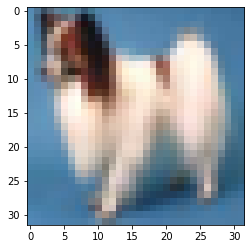

In [5]:
plt.imshow(X_train[4000])

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train(index))

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
   # plt.imshow(X_train(index))
    plt.imshow(X[index])

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel()

In [22]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [20]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
classes[3]

'cat'

In [58]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

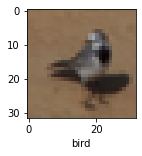

In [59]:
plot_sample(X_train, y_train, 5550)

In [17]:
# Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation = 'tanh'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 172s 110ms/step - loss: 1.7878 - accuracy: 0.3614
Epoch 2/3
1563/1563 [==============================] - 187s 120ms/step - loss: 1.5862 - accuracy: 0.4364
Epoch 3/3
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4920 - accuracy: 0.4692


In [39]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 11s 36ms/step - loss: 1.5955 - accuracy: 0.4358


[1.5955348014831543, 0.4357999861240387]

In [40]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.44      0.52      1000
           1       0.39      0.77      0.52      1000
           2       0.34      0.35      0.34      1000
           3       0.28      0.46      0.35      1000
           4       0.67      0.12      0.20      1000
           5       0.45      0.30      0.36      1000
           6       0.59      0.41      0.48      1000
           7       0.53      0.51      0.52      1000
           8       0.74      0.37      0.49      1000
           9       0.37      0.63      0.46      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.43     10000
weighted avg       0.50      0.44      0.43     10000



In [44]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # convolution is detecting the features in the image
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #dense
    layers.Flatten(),
    layers.Dense(100, activation='tanh'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # softmax will normalize the probability
])
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 62s 40ms/step - loss: 2.0086 - accuracy: 0.2674
Epoch 2/3
1563/1563 [==============================] - 62s 40ms/step - loss: 1.5968 - accuracy: 0.4256
Epoch 3/3
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4202 - accuracy: 0.4876


In [45]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2453 - accuracy: 0.5538
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9775 - accuracy: 0.6569
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8338 - accuracy: 0.7071
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7261 - accuracy: 0.7433
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6231 - accuracy: 0.7804
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5392 - accuracy: 0.8092
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4541 - accuracy: 0.8403
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.3768 - accuracy: 0.8669
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3092 - accuracy: 0.8915
Epoch 10/10
1563/1563 [==============================] - 70s 45m

In [ ]:
# With CNN, at the end 5 epochs, accuracy was at around 70% which is a 
# significant improvement over ANN. CNN's are best for image classification
# and gives superb accuracy. Also computation is much less compared to simple
# ANN as maxpooling reduces the image dimensions while still preserving the 
# features

In [48]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.2082 - accuracy: 0.6883


[1.2082446813583374, 0.6883000135421753]

In [49]:
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

In [50]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

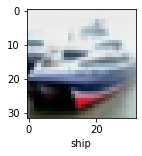

In [60]:
plot_sample(X_test, y_test,1)

In [54]:
y_pred = cnn.predict(X_test)
y_pred[:6]

array([[3.44641996e-03, 2.13278774e-02, 6.00188738e-04, 4.45303261e-01,
        1.75993086e-03, 5.19207656e-01, 1.16860995e-03, 4.09881031e-05,
        7.05040339e-03, 9.47533699e-05],
       [4.91368046e-05, 3.72812003e-01, 3.58049507e-10, 1.12794879e-07,
        2.19287349e-11, 5.48107870e-09, 4.32348379e-10, 1.12363535e-10,
        6.27137244e-01, 1.52425218e-06],
       [5.33246854e-03, 9.06689525e-01, 4.40370013e-06, 3.53011361e-04,
        1.14289810e-06, 5.46210322e-05, 2.69214092e-06, 1.80742572e-05,
        7.96770081e-02, 7.86705595e-03],
       [9.29977596e-01, 6.40513972e-05, 1.92391546e-03, 2.53945845e-03,
        1.63444187e-02, 4.59832518e-05, 5.53060272e-05, 2.74589020e-05,
        4.89994846e-02, 2.23964762e-05],
       [6.64326094e-11, 6.66940605e-06, 1.32275955e-03, 3.53089767e-04,
        9.88338709e-01, 5.25059877e-05, 9.92628466e-03, 1.18373480e-08,
        2.57031125e-08, 1.09211418e-09],
       [1.17584229e-07, 7.65936420e-05, 2.37113307e-03, 2.01949149e-01,
   

In [57]:
np.argmax(y_pred[0])

5

In [67]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[5, 8, 1, 0, 4, 6, 5, 6, 3, 1]

In [71]:
p = y_classes.reshape(-1,)
p

AttributeError: ignored

In [68]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)